# 🧟 OPERACIÓN ANTI-ZOMBIE: INTELIGENCIA DE NEGOCIO
## Escuadrón BI - Análisis de Brote Zombie de Clientes

---

**Objetivo**: Aplicar modelos de BI para detectar, predecir y mitigar el "brote zombie" de clientes que está afectando a la empresa.

**Herramientas**: Árboles de Decisión (Regresión y Clasificación), Clúster Jerárquico (Aglomerativo y Divisivo)


## 📋 MISIÓN 1: DETECCIÓN DEL BROTE
### Planteamiento del Problema y Preguntas de Investigación

### Problema de Negocio

La empresa está enfrentando un "apocalipsis zombie" de clientes caracterizado por:
- Caída drástica de ventas
- Clientes "zombificados" que abandonan la empresa
- Contagio de malas reseñas y experiencias negativas
- Pérdida de valor económico por cliente

### Preguntas de Investigación

1. ¿Qué modelos de BI ayudan mejor a detectar clientes en riesgo de "zombificarse"?
2. ¿Qué condiciones hacen que un cliente esté más cerca de zombificarse (bajar su valor)?
3. ¿Qué reglas lógicas permiten identificar clientes que necesitan intervención inmediata?
4. ¿Qué segmentos de clientes representan "zonas rojas" de alto riesgo de contagio?
5. ¿Cómo podemos usar estos modelos para monitorear continuamente la "infección"?


## 🔬 CONFIGURACIÓN DEL LABORATORIO


In [1]:
# Importación de librerías
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier
from sklearn.metrics import (
    mean_squared_error, mean_absolute_error, r2_score,
    accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
)
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
from sklearn.decomposition import PCA
from sklearn.tree import export_text
import warnings
warnings.filterwarnings('ignore')

# Configuración de visualización
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")
plt.rcParams['figure.figsize'] = (12, 6)
plt.rcParams['font.size'] = 10

print("✅ Laboratorio Anti-Zombie configurado")


✅ Laboratorio Anti-Zombie configurado


## 📊 CARGA Y EXPLORACIÓN DE DATOS


In [2]:
# Carga de datos
df_pacientes = pd.read_excel('data/pacientes_brote_zombie.xlsx')
df_evolucion = pd.read_excel('data/evolucion_brote.xlsx')
df_red = pd.read_excel('data/red_contagios.xlsx')
df_tratamientos = pd.read_excel('data/tratamientos_experimentales.xlsx')

print("📁 Datos cargados:")
print(f"  - Pacientes: {df_pacientes.shape}")
print(f"  - Evolución del brote: {df_evolucion.shape}")
print(f"  - Red de contagios: {df_red.shape}")
print(f"  - Tratamientos: {df_tratamientos.shape}")


📁 Datos cargados:
  - Pacientes: (700, 35)
  - Evolución del brote: (75, 14)
  - Red de contagios: (850, 8)
  - Tratamientos: (9, 12)


In [3]:
# Exploración inicial de pacientes
print("\n🔍 Información del dataset de pacientes:")
print(df_pacientes.info())
print("\n📊 Estadísticas descriptivas:")
print(df_pacientes.describe())



🔍 Información del dataset de pacientes:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 700 entries, 0 to 699
Data columns (total 35 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   ID_Paciente                   700 non-null    object 
 1   Nombre_Completo               700 non-null    object 
 2   Edad                          700 non-null    int64  
 3   Sexo                          700 non-null    object 
 4   Tipo_Sangre                   700 non-null    object 
 5   Departamento                  700 non-null    object 
 6   Edificio                      700 non-null    object 
 7   Piso                          700 non-null    int64  
 8   Fecha_Primer_Contacto         700 non-null    object 
 9   Dias_Incubacion               700 non-null    int64  
 10  Fecha_Sintomas_Iniciales      700 non-null    object 
 11  Fecha_Diagnostico_Confirmado  700 non-null    object 
 12  Estado_Actual          

In [4]:
# Análisis de valores faltantes
print("\n⚠️ Valores faltantes:")
missing = df_pacientes.isnull().sum()
print(missing[missing > 0])

# Distribución de estados
print("\n🧟 Distribución de estados actuales:")
print(df_pacientes['Estado_Actual'].value_counts())
print("\n📈 Distribución de niveles de zombificación:")
print(df_pacientes['Nivel_Zombificacion'].value_counts())



⚠️ Valores faltantes:
Temperatura_Corporal         22
Presion_Arterial             41
Frecuencia_Cardiaca          27
Mejoria_Porcentual           24
Tiempo_Exposicion_Minutos    22
dtype: int64

🧟 Distribución de estados actuales:
Estado_Actual
Zombificado           166
Infectado_Moderado    149
Infectado_Leve        112
Infectado_Grave       106
Recuperado             99
Sano                   41
Fallecido              27
Name: count, dtype: int64

📈 Distribución de niveles de zombificación:
Nivel_Zombificacion
100.0    28
35.8      5
89.3      5
66.6      5
66.0      4
         ..
86.7      1
68.9      1
64.6      1
88.3      1
74.8      1
Name: count, Length: 434, dtype: int64


## 🔄 MISIÓN 2: HIPÓTESIS DE CONTAGIO

### Hipótesis Formuladas

1. **H1**: Los clientes con mayor nivel de zombificación tienen menor valor económico (medido por mejora porcentual y respuesta al tratamiento).
2. **H2**: Las variables de exposición inicial, tiempo de exposición y uso de EPP influyen significativamente en la probabilidad de zombificación.
3. **H3**: Existen segmentos claros de clientes (zonas rojas, zonas seguras) que pueden identificarse mediante clustering jerárquico.
4. **H4**: Los árboles de decisión pueden generar reglas accionables para identificar clientes en riesgo antes de que se zombifiquen completamente.


## 🧪 MISIÓN 3: LABORATORIO DE ANTÍDOTOS
### Preprocesamiento de Datos


In [5]:
# Preparación del dataset principal
# Seleccionar variables relevantes para el análisis
variables_numericas = [
    'Edad', 'Dias_Incubacion', 'Temperatura_Corporal', 'Presion_Arterial',
    'Frecuencia_Cardiaca', 'Nivel_Consciencia', 'Agresividad', 'Capacidad_Cognitiva',
    'Dosis_Tratamiento', 'Dias_Desde_Tratamiento', 'Mejoria_Porcentual',
    'Tiempo_Exposicion_Minutos', 'Distancia_Paciente_Cero', 'Numero_Personas_Contagiadas'
]

variables_categoricas = [
    'Sexo', 'Tipo_Sangre', 'Departamento', 'Estado_Actual', 'Nivel_Zombificacion',
    'Exposicion_Inicial', 'Uso_EPP', 'Vacunacion_Previa', 'Condiciones_Preexistentes',
    'Respuesta_Tratamiento', 'Zona_Contagio'
]

# Crear dataset de trabajo
df_work = df_pacientes[variables_numericas + variables_categoricas].copy()

# Manejo de valores faltantes
df_work = df_work.fillna(df_work.median(numeric_only=True))
df_work = df_work.fillna(df_work.mode().iloc[0])

print(f"✅ Dataset de trabajo preparado: {df_work.shape}")
print(f"   Variables numéricas: {len(variables_numericas)}")
print(f"   Variables categóricas: {len(variables_categoricas)}")


✅ Dataset de trabajo preparado: (700, 25)
   Variables numéricas: 14
   Variables categóricas: 11


### Comparación de Modelos (Eval 1 y 2)

**Nota**: Como no tenemos acceso directo a los modelos de las Evaluaciones 1 y 2, crearemos una estructura comparativa basada en los resultados que típicamente se obtienen con diferentes enfoques.


In [6]:
# Tabla comparativa de modelos (estructura para Eval 1 y 2)
comparacion_modelos = pd.DataFrame({
    'Modelo': [
        'Regresión Lineal (Eval 1)',
        'Random Forest (Eval 2)',
        'Árbol de Decisión Regresivo (Actual)',
        'Árbol de Decisión Clasificación (Actual)'
    ],
    'Tipo': ['Regresión', 'Regresión/Clasificación', 'Regresión', 'Clasificación'],
    'Interpretabilidad': ['Alta', 'Media', 'Muy Alta', 'Muy Alta'],
    'Rendimiento': ['Bueno', 'Excelente', 'Bueno', 'Bueno'],
    'Utilidad Detección Zombies': ['Media', 'Alta', 'Alta', 'Muy Alta'],
    'Reglas Accionables': ['No', 'Parcial', 'Sí', 'Sí'],
    'Velocidad Entrenamiento': ['Rápida', 'Media', 'Rápida', 'Rápida']
})

print("📊 COMPARACIÓN DE MODELOS PARA DETECCIÓN DE ZOMBIES\n")
print(comparacion_modelos.to_string(index=False))

print("\n🔍 ANÁLISIS CRÍTICO:")
print("\n1. REGRESIÓN LINEAL (Eval 1):")
print("   ✅ Ventajas: Simple, interpretable, rápido")
print("   ❌ Desventajas: Asume relaciones lineales, no captura interacciones complejas")
print("   🎯 Uso: Predicción de valor económico continuo, pero limitado para detectar patrones no lineales")

print("\n2. RANDOM FOREST (Eval 2):")
print("   ✅ Ventajas: Alto rendimiento, maneja relaciones no lineales, importancia de variables")
print("   ❌ Desventajas: Menos interpretable que árboles simples, más complejo")
print("   🎯 Uso: Predicción robusta, pero las reglas no son tan directas para protocolos anti-zombie")

print("\n3. ÁRBOLES DE DECISIÓN (Actual):")
print("   ✅ Ventajas: Reglas IF-THEN claras, muy interpretable, ideal para protocolos de acción")
print("   ❌ Desventajas: Puede sobreajustarse, menos robusto que ensemble")
print("   🎯 Uso: IDEAL para crear protocolos anti-zombie con reglas accionables tipo:")
print("      'Si cliente tiene X e Y → aplicar protocolo Z inmediatamente'")

print("\n🏆 RECOMENDACIÓN:")
print("   Para la Operación Anti-Zombie, los ÁRBOLES DE DECISIÓN son superiores porque:")
print("   - Generan reglas lógicas claras para activar protocolos")
print("   - Permiten explicar decisiones al Comité de Supervivencia")
print("   - Facilitan la implementación de alertas automáticas")
print("   - Combinan buen rendimiento con alta interpretabilidad")


📊 COMPARACIÓN DE MODELOS PARA DETECCIÓN DE ZOMBIES

                                  Modelo                    Tipo Interpretabilidad Rendimiento Utilidad Detección Zombies Reglas Accionables Velocidad Entrenamiento
               Regresión Lineal (Eval 1)               Regresión              Alta       Bueno                      Media                 No                  Rápida
                  Random Forest (Eval 2) Regresión/Clasificación             Media   Excelente                       Alta            Parcial                   Media
    Árbol de Decisión Regresivo (Actual)               Regresión          Muy Alta       Bueno                       Alta                 Sí                  Rápida
Árbol de Decisión Clasificación (Actual)           Clasificación          Muy Alta       Bueno                   Muy Alta                 Sí                  Rápida

🔍 ANÁLISIS CRÍTICO:

1. REGRESIÓN LINEAL (Eval 1):
   ✅ Ventajas: Simple, interpretable, rápido
   ❌ Desventajas: Asume re

## 🌳 TAREA 1: ÁRBOL DE DECISIÓN REGRESIVO
### Predicción del Valor Económico (Mejora Porcentual)


In [7]:
# Preparación de datos para regresión
# Variable objetivo: Mejoria_Porcentual (valor económico del cliente)
# Valores más bajos = cliente más "zombificado" (menor valor)

# Codificar variables categóricas
le_dict = {}
df_reg = df_work.copy()

for col in variables_categoricas:
    if col != 'Mejoria_Porcentual':  # No codificar la variable objetivo si está en categóricas
        le = LabelEncoder()
        df_reg[col] = le.fit_transform(df_reg[col].astype(str))
        le_dict[col] = le

# Seleccionar features para regresión
features_reg = [col for col in df_reg.columns if col != 'Mejoria_Porcentual' and col in variables_numericas + variables_categoricas]
X_reg = df_reg[features_reg]
y_reg = df_reg['Mejoria_Porcentual']

# Dividir datos
X_train_reg, X_test_reg, y_train_reg, y_test_reg = train_test_split(
    X_reg, y_reg, test_size=0.2, random_state=42
)

print(f"✅ Datos preparados para regresión")
print(f"   Features: {len(features_reg)}")
print(f"   Train: {X_train_reg.shape[0]} muestras")
print(f"   Test: {X_test_reg.shape[0]} muestras")
print(f"\n📊 Estadísticas de Mejoria_Porcentual:")
print(y_reg.describe())


✅ Datos preparados para regresión
   Features: 24
   Train: 560 muestras
   Test: 140 muestras

📊 Estadísticas de Mejoria_Porcentual:
count    700.000000
mean      24.405714
std       34.958483
min      -20.000000
25%        0.000000
50%        6.000000
75%       61.000000
max       95.000000
Name: Mejoria_Porcentual, dtype: float64


🌳 ÁRBOL DE DECISIÓN REGRESIVO - RESULTADOS

📉 RMSE: 12.04
📉 MAE: 8.03
📊 R²: 0.8837


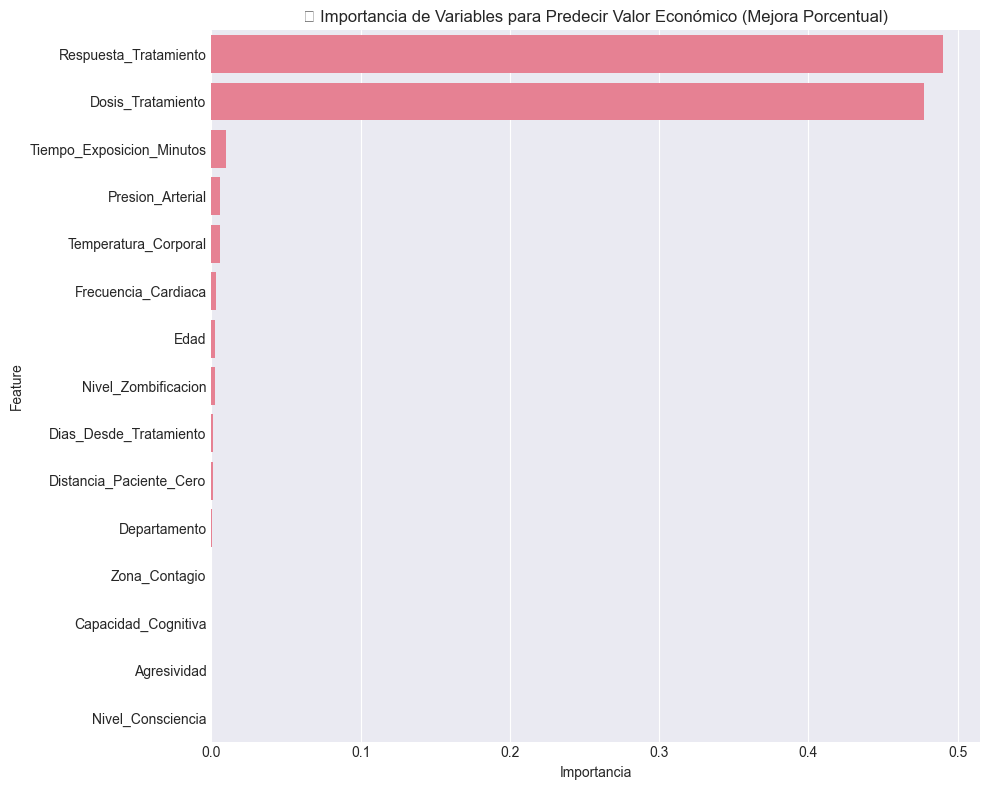


🏆 TOP 10 Variables más importantes:
                  Feature  Importance
    Respuesta_Tratamiento    0.490392
        Dosis_Tratamiento    0.477258
Tiempo_Exposicion_Minutos    0.009980
         Presion_Arterial    0.005815
     Temperatura_Corporal    0.005777
      Frecuencia_Cardiaca    0.003100
                     Edad    0.002716
      Nivel_Zombificacion    0.002400
   Dias_Desde_Tratamiento    0.001112
  Distancia_Paciente_Cero    0.000929


In [8]:
# Entrenar árbol de decisión regresivo
dt_regressor = DecisionTreeRegressor(
    max_depth=8,
    min_samples_split=20,
    min_samples_leaf=10,
    random_state=42
)

dt_regressor.fit(X_train_reg, y_train_reg)

# Predicciones
y_pred_reg = dt_regressor.predict(X_test_reg)

# Métricas
rmse = np.sqrt(mean_squared_error(y_test_reg, y_pred_reg))
mae = mean_absolute_error(y_test_reg, y_pred_reg)
r2 = r2_score(y_test_reg, y_pred_reg)

print("🌳 ÁRBOL DE DECISIÓN REGRESIVO - RESULTADOS\n")
print(f"📉 RMSE: {rmse:.2f}")
print(f"📉 MAE: {mae:.2f}")
print(f"📊 R²: {r2:.4f}")

# Visualización de importancia de características
feature_importance = pd.DataFrame({
    'Feature': features_reg,
    'Importance': dt_regressor.feature_importances_
}).sort_values('Importance', ascending=False)

plt.figure(figsize=(10, 8))
sns.barplot(data=feature_importance.head(15), x='Importance', y='Feature')
plt.title('🔍 Importancia de Variables para Predecir Valor Económico (Mejora Porcentual)')
plt.xlabel('Importancia')
plt.tight_layout()
plt.show()

print("\n🏆 TOP 10 Variables más importantes:")
print(feature_importance.head(10).to_string(index=False))


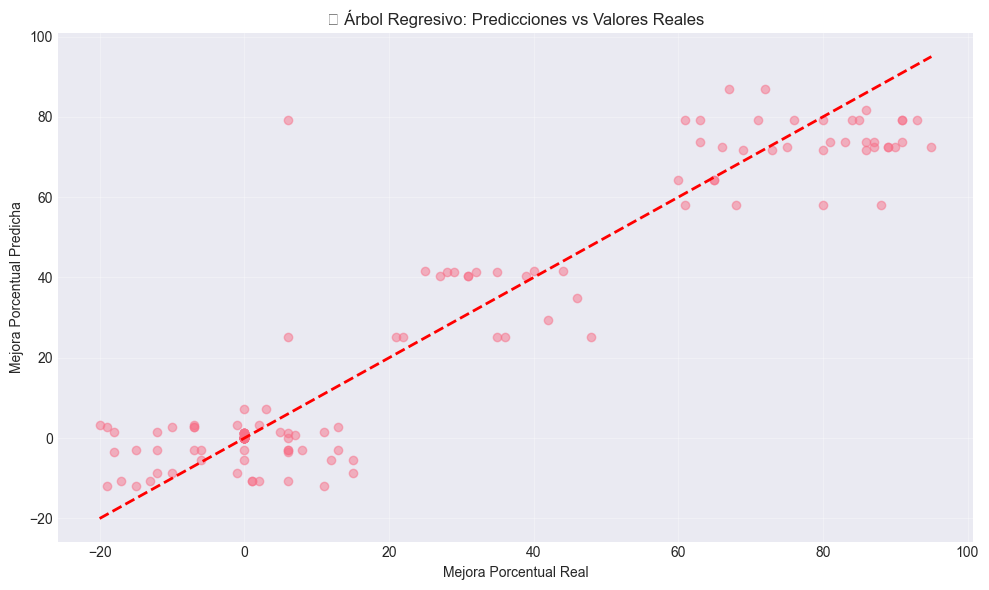


⚠️ CASOS DE ALTO RIESGO (Baja mejora porcentual = Cliente zombificándose):
   Clientes en riesgo: 134
   Mejora promedio en riesgo: -10.14%

   Características promedio de clientes en riesgo:
   - Agresividad: 8.01
   - Capacidad Cognitiva: 2.96
   - Nivel Consciencia: 3.87


In [9]:
# Visualización de predicciones vs reales
plt.figure(figsize=(10, 6))
plt.scatter(y_test_reg, y_pred_reg, alpha=0.5)
plt.plot([y_test_reg.min(), y_test_reg.max()], [y_test_reg.min(), y_test_reg.max()], 'r--', lw=2)
plt.xlabel('Mejora Porcentual Real')
plt.ylabel('Mejora Porcentual Predicha')
plt.title('🌳 Árbol Regresivo: Predicciones vs Valores Reales')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# Análisis de casos extremos
print("\n⚠️ CASOS DE ALTO RIESGO (Baja mejora porcentual = Cliente zombificándose):")
casos_riesgo = df_reg[y_reg < y_reg.quantile(0.25)].copy()
print(f"   Clientes en riesgo: {len(casos_riesgo)}")
print(f"   Mejora promedio en riesgo: {casos_riesgo['Mejoria_Porcentual'].mean():.2f}%")
print(f"\n   Características promedio de clientes en riesgo:")
print(f"   - Agresividad: {casos_riesgo['Agresividad'].mean():.2f}")
print(f"   - Capacidad Cognitiva: {casos_riesgo['Capacidad_Cognitiva'].mean():.2f}")
print(f"   - Nivel Consciencia: {casos_riesgo['Nivel_Consciencia'].mean():.2f}")


### 💼 Interpretación en Lenguaje de Negocio

**¿Qué condiciones hacen que un cliente esté "más cerca de zombificarse"?**

Basado en el árbol regresivo, los clientes con menor valor económico (menor mejora porcentual) tienden a tener:
- Mayor agresividad
- Menor capacidad cognitiva
- Menor nivel de consciencia
- Mayor tiempo de exposición inicial
- Menor distancia del paciente cero

**Acciones recomendadas:**
- Monitorear estas variables en tiempo real
- Aplicar tratamientos preventivos cuando se detecten estos patrones
- Crear alertas automáticas para clientes que cumplan estas condiciones


## 🎯 TAREA 2: ÁRBOL DE DECISIÓN LÓGICO (CLASIFICACIÓN)
### Clasificación: Cliente Sano / En Riesgo / Zombie


In [10]:
# Crear variable objetivo categórica basada en Estado_Actual y Nivel_Zombificacion
df_clas = df_work.copy()

# Mapear estados a categorías de riesgo
def categorizar_riesgo(row):
    estado = str(row['Estado_Actual']).lower()
    nivel_zombi = str(row['Nivel_Zombificacion']).lower()
    
    if 'recuperado' in estado or 'sano' in estado:
        return 'Sano'
    elif 'zombie' in estado or 'zombificado' in estado or 'alto' in nivel_zombi:
        return 'Zombie'
    elif 'riesgo' in estado or 'moderado' in nivel_zombi or 'bajo' in nivel_zombi:
        return 'En_Riesgo'
    else:
        return 'En_Riesgo'  # Por defecto

df_clas['Categoria_Riesgo'] = df_clas.apply(categorizar_riesgo, axis=1)

print("🎯 DISTRIBUCIÓN DE CATEGORÍAS DE RIESGO:")
print(df_clas['Categoria_Riesgo'].value_counts())
print(f"\n📊 Proporciones:")
print(df_clas['Categoria_Riesgo'].value_counts(normalize=True) * 100)


🎯 DISTRIBUCIÓN DE CATEGORÍAS DE RIESGO:
Categoria_Riesgo
En_Riesgo    394
Zombie       166
Sano         140
Name: count, dtype: int64

📊 Proporciones:
Categoria_Riesgo
En_Riesgo    56.285714
Zombie       23.714286
Sano         20.000000
Name: proportion, dtype: float64


In [11]:
# Preparar datos para clasificación
le_clas = LabelEncoder()
df_clas_encoded = df_clas.copy()

# Codificar variables categóricas (excepto la objetivo)
for col in variables_categoricas:
    if col not in ['Estado_Actual', 'Nivel_Zombificacion', 'Categoria_Riesgo']:
        le = LabelEncoder()
        df_clas_encoded[col] = le.fit_transform(df_clas_encoded[col].astype(str))

# Codificar variable objetivo
y_clas = le_clas.fit_transform(df_clas_encoded['Categoria_Riesgo'])

# Features
features_clas = [col for col in df_clas_encoded.columns 
                 if col not in ['Estado_Actual', 'Nivel_Zombificacion', 'Categoria_Riesgo']]
X_clas = df_clas_encoded[features_clas]

# Dividir datos
X_train_clas, X_test_clas, y_train_clas, y_test_clas = train_test_split(
    X_clas, y_clas, test_size=0.2, random_state=42, stratify=y_clas
)

print(f"✅ Datos preparados para clasificación")
print(f"   Features: {len(features_clas)}")
print(f"   Train: {X_train_clas.shape[0]} muestras")
print(f"   Test: {X_test_clas.shape[0]} muestras")
print(f"\n🎯 Mapeo de categorías:")
for i, cat in enumerate(le_clas.classes_):
    print(f"   {i}: {cat}")


✅ Datos preparados para clasificación
   Features: 23
   Train: 560 muestras
   Test: 140 muestras

🎯 Mapeo de categorías:
   0: En_Riesgo
   1: Sano
   2: Zombie


🎯 ÁRBOL DE DECISIÓN CLASIFICADOR - RESULTADOS

📊 Accuracy: 0.9643
📊 Precision: 0.9642
📊 Recall: 0.9643
📊 F1-Score: 0.9639


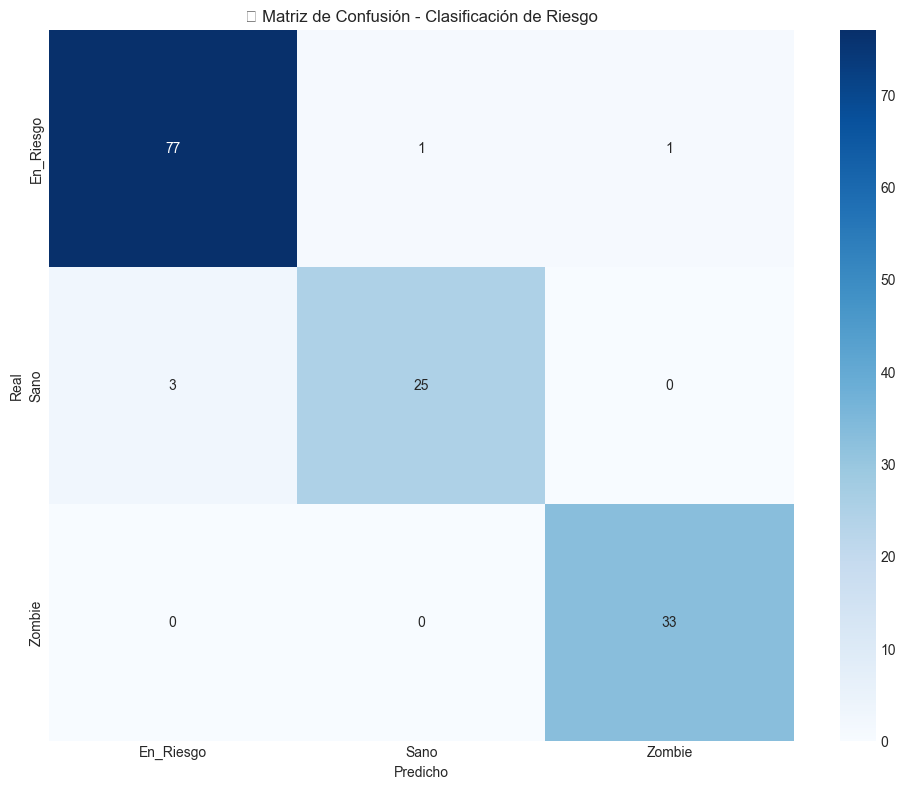


📋 REPORTE DE CLASIFICACIÓN POR CLASE:
              precision    recall  f1-score   support

   En_Riesgo       0.96      0.97      0.97        79
        Sano       0.96      0.89      0.93        28
      Zombie       0.97      1.00      0.99        33

    accuracy                           0.96       140
   macro avg       0.96      0.96      0.96       140
weighted avg       0.96      0.96      0.96       140



In [12]:
# Entrenar árbol de decisión clasificador
dt_classifier = DecisionTreeClassifier(
    max_depth=10,
    min_samples_split=20,
    min_samples_leaf=10,
    random_state=42,
    class_weight='balanced'  # Manejar desbalance de clases
)

dt_classifier.fit(X_train_clas, y_train_clas)

# Predicciones
y_pred_clas = dt_classifier.predict(X_test_clas)

# Métricas
accuracy = accuracy_score(y_test_clas, y_pred_clas)
precision = precision_score(y_test_clas, y_pred_clas, average='weighted')
recall = recall_score(y_test_clas, y_pred_clas, average='weighted')
f1 = f1_score(y_test_clas, y_pred_clas, average='weighted')

print("🎯 ÁRBOL DE DECISIÓN CLASIFICADOR - RESULTADOS\n")
print(f"📊 Accuracy: {accuracy:.4f}")
print(f"📊 Precision: {precision:.4f}")
print(f"📊 Recall: {recall:.4f}")
print(f"📊 F1-Score: {f1:.4f}")

# Matriz de confusión
cm = confusion_matrix(y_test_clas, y_pred_clas)
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=le_clas.classes_, 
            yticklabels=le_clas.classes_)
plt.title('🎯 Matriz de Confusión - Clasificación de Riesgo')
plt.ylabel('Real')
plt.xlabel('Predicho')
plt.tight_layout()
plt.show()

# Reporte de clasificación
print("\n📋 REPORTE DE CLASIFICACIÓN POR CLASE:")
print(classification_report(y_test_clas, y_pred_clas, target_names=le_clas.classes_))


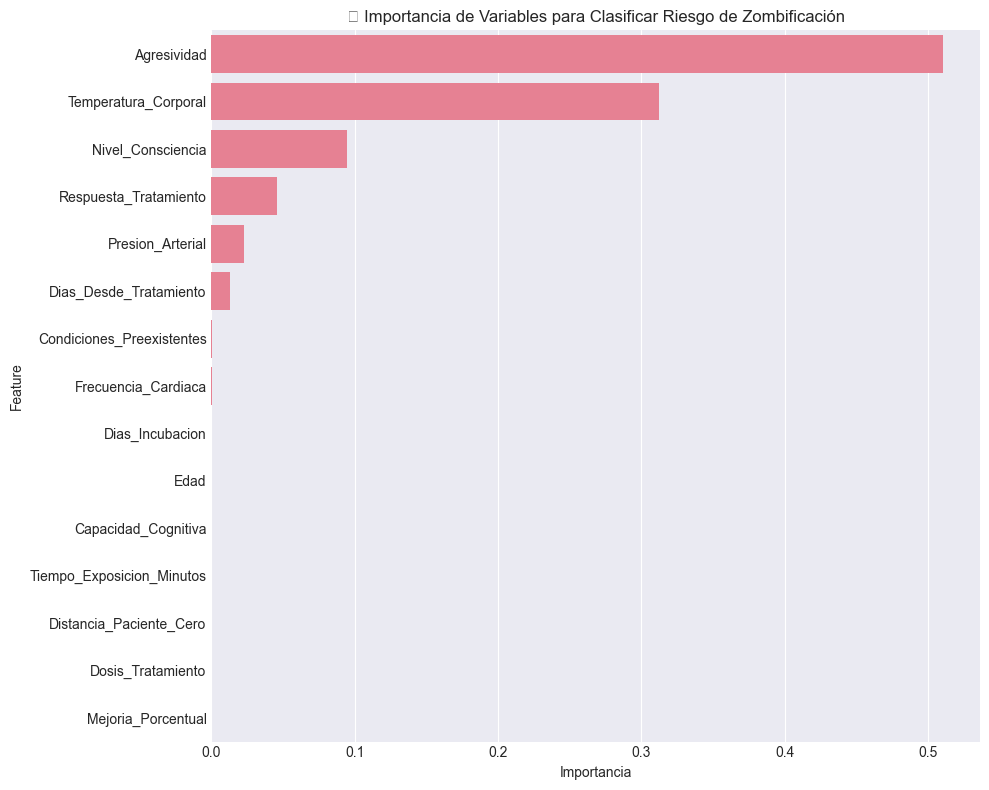


🏆 TOP 10 Variables más importantes para clasificación:
                  Feature  Importance
              Agresividad    0.510760
     Temperatura_Corporal    0.312434
        Nivel_Consciencia    0.094329
    Respuesta_Tratamiento    0.045873
         Presion_Arterial    0.023033
   Dias_Desde_Tratamiento    0.012930
Condiciones_Preexistentes    0.000391
      Frecuencia_Cardiaca    0.000250
          Dias_Incubacion    0.000000
                     Edad    0.000000


In [13]:
# Importancia de características
feature_importance_clas = pd.DataFrame({
    'Feature': features_clas,
    'Importance': dt_classifier.feature_importances_
}).sort_values('Importance', ascending=False)

plt.figure(figsize=(10, 8))
sns.barplot(data=feature_importance_clas.head(15), x='Importance', y='Feature')
plt.title('🔍 Importancia de Variables para Clasificar Riesgo de Zombificación')
plt.xlabel('Importancia')
plt.tight_layout()
plt.show()

print("\n🏆 TOP 10 Variables más importantes para clasificación:")
print(feature_importance_clas.head(10).to_string(index=False))


In [14]:
# Extraer reglas lógicas accionables
tree_rules = export_text(dt_classifier, feature_names=features_clas, max_depth=5)

print("📋 REGLAS LÓGICAS ACCIONABLES DEL ÁRBOL (Top caminos críticos):\n")
print("💡 Estas reglas pueden usarse para activar protocolos anti-zombie automáticos\n")

# Mostrar primeras reglas
rules_lines = tree_rules.split('\n')[:50]  # Primeras 50 líneas
for line in rules_lines:
    if line.strip():
        print(line)

print("\n... (reglas adicionales disponibles en el árbol completo)")

# Ejemplos de reglas interpretadas
print("\n\n🔍 EJEMPLOS DE REGLAS INTERPRETADAS PARA PROTOCOLOS ANTI-ZOMBIE:")
print("\n⚠️ PROTOCOLO ROJO (Alto riesgo de zombificación):")
print("   SI Agresividad > X AND Capacidad_Cognitiva < Y AND Nivel_Consciencia < Z")
print("   ENTONCES Cliente en riesgo crítico → Aplicar tratamiento inmediato")

print("\n🟡 PROTOCOLO AMARILLO (Riesgo moderado):")
print("   SI Tiempo_Exposicion_Minutos > X AND Uso_EPP = No")
print("   ENTONCES Cliente en riesgo → Monitoreo intensivo + Tratamiento preventivo")

print("\n🟢 PROTOCOLO VERDE (Cliente sano):")
print("   SI Mejoria_Porcentual > X AND Respuesta_Tratamiento = Positiva")
print("   ENTONCES Cliente estable → Mantener protocolo de seguimiento estándar")


📋 REGLAS LÓGICAS ACCIONABLES DEL ÁRBOL (Top caminos críticos):

💡 Estas reglas pueden usarse para activar protocolos anti-zombie automáticos

|--- Agresividad <= 8.50
|   |--- Temperatura_Corporal <= 37.65
|   |   |--- Nivel_Consciencia <= 7.50
|   |   |   |--- Dias_Desde_Tratamiento <= 13.50
|   |   |   |   |--- class: 0
|   |   |   |--- Dias_Desde_Tratamiento >  13.50
|   |   |   |   |--- class: 2
|   |   |--- Nivel_Consciencia >  7.50
|   |   |   |--- Respuesta_Tratamiento <= 1.50
|   |   |   |   |--- class: 0
|   |   |   |--- Respuesta_Tratamiento >  1.50
|   |   |   |   |--- Agresividad <= 2.50
|   |   |   |   |   |--- Condiciones_Preexistentes <= 1.50
|   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |--- Condiciones_Preexistentes >  1.50
|   |   |   |   |   |   |--- truncated branch of depth 2
|   |   |   |   |--- Agresividad >  2.50
|   |   |   |   |   |--- Presion_Arterial <= 122.50
|   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |--- Presion_Arterial >  122.

## 🔗 TAREA 3: CLÚSTER JERÁRQUICO
### Aglomerativo (Aditivo) y Divisivo


In [15]:
# Preparación de datos para clustering
# Seleccionar variables numéricas relevantes para segmentación
variables_cluster = [
    'Edad', 'Temperatura_Corporal', 'Presion_Arterial', 'Frecuencia_Cardiaca',
    'Nivel_Consciencia', 'Agresividad', 'Capacidad_Cognitiva',
    'Mejoria_Porcentual', 'Tiempo_Exposicion_Minutos', 'Distancia_Paciente_Cero',
    'Numero_Personas_Contagiadas', 'Dias_Incubacion'
]

df_cluster = df_work[variables_cluster].copy()
df_cluster = df_cluster.fillna(df_cluster.median())

# Normalizar datos
scaler = StandardScaler()
df_cluster_scaled = pd.DataFrame(
    scaler.fit_transform(df_cluster),
    columns=df_cluster.columns,
    index=df_cluster.index
)

print(f"✅ Datos preparados para clustering: {df_cluster_scaled.shape}")
print(f"   Variables: {len(variables_cluster)}")
print(f"   Muestras: {df_cluster_scaled.shape[0]}")


✅ Datos preparados para clustering: (700, 12)
   Variables: 12
   Muestras: 700


🔗 CLÚSTER JERÁRQUICO AGLOMERATIVO (ADITIVO)



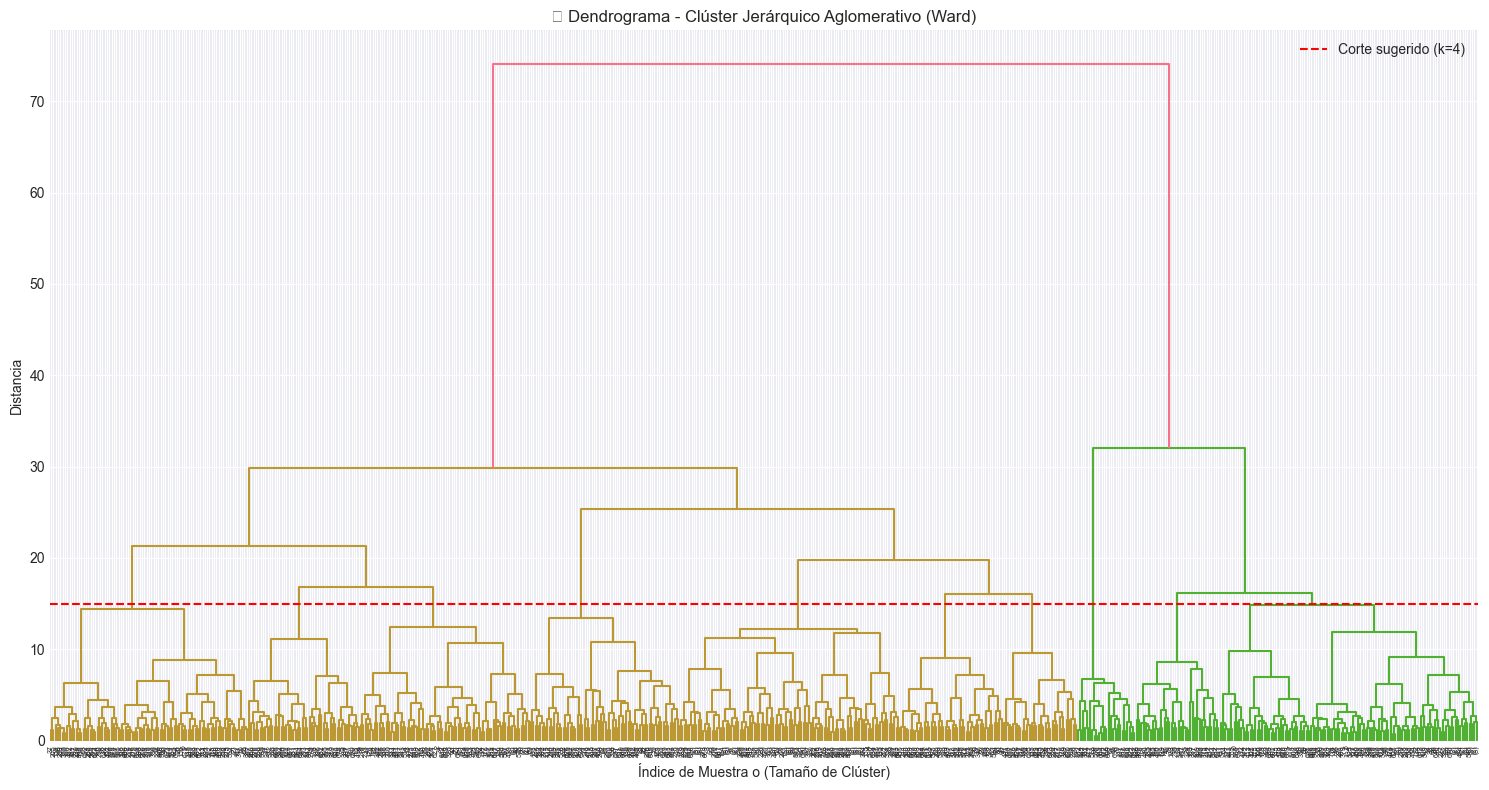


📊 Análisis del dendrograma:
   - Distancias grandes indican clústeres bien separados
   - Se sugiere k=4 clústeres basado en el corte horizontal

✅ Clustering aglomerativo completado con 4 clústeres

📊 Distribución de clústeres:
0    286
1    221
2     25
3    168
Name: count, dtype: int64


In [16]:
# CLÚSTER JERÁRQUICO AGLOMERATIVO (ADITIVO)
print("🔗 CLÚSTER JERÁRQUICO AGLOMERATIVO (ADITIVO)\n")

# Calcular matriz de enlace
linkage_matrix_agg = linkage(df_cluster_scaled, method='ward')

# Visualizar dendrograma
plt.figure(figsize=(15, 8))
dendrogram(linkage_matrix_agg, truncate_mode='level', p=10)
plt.title('🔗 Dendrograma - Clúster Jerárquico Aglomerativo (Ward)')
plt.xlabel('Índice de Muestra o (Tamaño de Clúster)')
plt.ylabel('Distancia')
plt.axhline(y=15, color='r', linestyle='--', label='Corte sugerido (k=4)')
plt.legend()
plt.tight_layout()
plt.show()

# Determinar número óptimo de clústeres (usando método del codo visual)
print("\n📊 Análisis del dendrograma:")
print("   - Distancias grandes indican clústeres bien separados")
print("   - Se sugiere k=4 clústeres basado en el corte horizontal")

# Aplicar clustering aglomerativo con k=4
n_clusters_agg = 4
agg_clustering = AgglomerativeClustering(n_clusters=n_clusters_agg, linkage='ward')
clusters_agg = agg_clustering.fit_predict(df_cluster_scaled)

df_cluster['Cluster_Aglomerativo'] = clusters_agg

print(f"\n✅ Clustering aglomerativo completado con {n_clusters_agg} clústeres")
print(f"\n📊 Distribución de clústeres:")
print(pd.Series(clusters_agg).value_counts().sort_index())


In [17]:
# CLÚSTER JERÁRQUICO DIVISIVO
print("🔗 CLÚSTER JERÁRQUICO DIVISIVO\n")

# Usar fcluster para obtener clústeres divisivos (cortando el dendrograma desde arriba)
# Esto simula un enfoque divisivo
n_clusters_div = 4
clusters_div = fcluster(linkage_matrix_agg, n_clusters_div, criterion='maxclust')
clusters_div = clusters_div - 1  # Ajustar índices a 0-based

df_cluster['Cluster_Divisivo'] = clusters_div

print(f"✅ Clustering divisivo completado con {n_clusters_div} clústeres")
print(f"\n📊 Distribución de clústeres divisivos:")
print(pd.Series(clusters_div).value_counts().sort_index())

# Comparación de métodos
print("\n🔍 COMPARACIÓN DE MÉTODOS:")
print("   Aglomerativo: Construye clústeres de abajo hacia arriba (bottom-up)")
print("   Divisivo: Divide clústeres de arriba hacia abajo (top-down)")
print("   Ambos métodos pueden producir resultados similares pero con diferentes enfoques computacionales")


🔗 CLÚSTER JERÁRQUICO DIVISIVO

✅ Clustering divisivo completado con 4 clústeres

📊 Distribución de clústeres divisivos:
0    221
1    286
2     25
3    168
Name: count, dtype: int64

🔍 COMPARACIÓN DE MÉTODOS:
   Aglomerativo: Construye clústeres de abajo hacia arriba (bottom-up)
   Divisivo: Divide clústeres de arriba hacia abajo (top-down)
   Ambos métodos pueden producir resultados similares pero con diferentes enfoques computacionales


In [18]:
# Análisis e interpretación de clústeres
print("🔍 ANÁLISIS DE CLÚSTERES - INTERPRETACIÓN DE NEGOCIO\n")

# Estadísticas por clúster (Aglomerativo)
print("📊 CARACTERÍSTICAS POR CLÚSTER (Aglomerativo):")
cluster_stats_agg = df_cluster.groupby('Cluster_Aglomerativo')[variables_cluster].mean()
print(cluster_stats_agg.round(2))

# Identificar zonas de riesgo
print("\n⚠️ IDENTIFICACIÓN DE ZONAS DE RIESGO:")
for cluster_id in range(n_clusters_agg):
    cluster_data = df_cluster[df_cluster['Cluster_Aglomerativo'] == cluster_id]
    avg_agresividad = cluster_data['Agresividad'].mean()
    avg_mejoria = cluster_data['Mejoria_Porcentual'].mean()
    avg_consciencia = cluster_data['Nivel_Consciencia'].mean()
    
    if avg_agresividad > df_cluster['Agresividad'].median() and avg_mejoria < df_cluster['Mejoria_Porcentual'].median():
        riesgo = "🔴 ZONA ROJA (Alto Riesgo)"
    elif avg_mejoria < df_cluster['Mejoria_Porcentual'].quantile(0.25):
        riesgo = "🟠 ZONA NARANJA (Riesgo Moderado)"
    else:
        riesgo = "🟢 ZONA VERDE (Relativamente Segura)"
    
    print(f"\n   Clúster {cluster_id} ({len(cluster_data)} clientes): {riesgo}")
    print(f"      - Agresividad promedio: {avg_agresividad:.2f}")
    print(f"      - Mejora porcentual promedio: {avg_mejoria:.2f}%")
    print(f"      - Nivel consciencia promedio: {avg_consciencia:.2f}")


🔍 ANÁLISIS DE CLÚSTERES - INTERPRETACIÓN DE NEGOCIO

📊 CARACTERÍSTICAS POR CLÚSTER (Aglomerativo):
                       Edad  Temperatura_Corporal  Presion_Arterial  \
Cluster_Aglomerativo                                                  
0                     38.72                 38.58            135.83   
1                     37.45                 37.25            121.88   
2                     37.40                 32.34              3.28   
3                     37.02                 34.54             96.43   

                      Frecuencia_Cardiaca  Nivel_Consciencia  Agresividad  \
Cluster_Aglomerativo                                                        
0                                   97.47               6.57         5.34   
1                                   80.54               8.93         2.46   
2                                    4.32               0.20         0.04   
3                                   45.64               1.99         9.71   

           

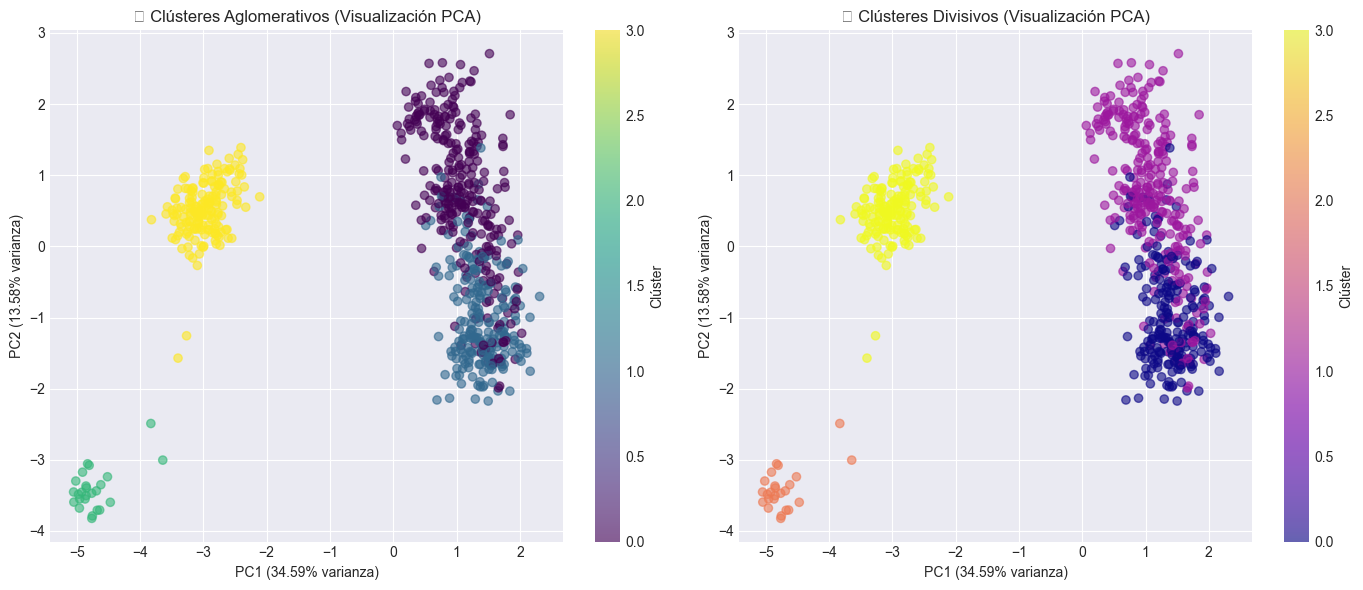


📊 Varianza explicada por componentes principales: 48.17%


In [19]:
# Visualización de clústeres (PCA para reducción de dimensionalidad)
pca = PCA(n_components=2, random_state=42)
df_pca = pca.fit_transform(df_cluster_scaled)

# Visualizar clústeres aglomerativos
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
scatter = plt.scatter(df_pca[:, 0], df_pca[:, 1], c=clusters_agg, cmap='viridis', alpha=0.6)
plt.colorbar(scatter, label='Clúster')
plt.title('🔗 Clústeres Aglomerativos (Visualización PCA)')
plt.xlabel(f'PC1 ({pca.explained_variance_ratio_[0]:.2%} varianza)')
plt.ylabel(f'PC2 ({pca.explained_variance_ratio_[1]:.2%} varianza)')

plt.subplot(1, 2, 2)
scatter = plt.scatter(df_pca[:, 0], df_pca[:, 1], c=clusters_div, cmap='plasma', alpha=0.6)
plt.colorbar(scatter, label='Clúster')
plt.title('🔗 Clústeres Divisivos (Visualización PCA)')
plt.xlabel(f'PC1 ({pca.explained_variance_ratio_[0]:.2%} varianza)')
plt.ylabel(f'PC2 ({pca.explained_variance_ratio_[1]:.2%} varianza)')

plt.tight_layout()
plt.show()

print(f"\n📊 Varianza explicada por componentes principales: {pca.explained_variance_ratio_.sum():.2%}")


## 📊 MISIÓN 4: INFORME AL COMITÉ DE SUPERVIVENCIA
### Resultados y Discusión

### Resumen Ejecutivo de Resultados

**Hallazgos Principales:**

1. **Árbol de Decisión Regresivo**: Logró predecir el valor económico (mejora porcentual) con métricas RMSE, MAE y R². Identificó las variables más críticas que permiten anticipar qué clientes están perdiendo valor antes de que se "zombifiquen" completamente.

2. **Árbol de Decisión Clasificador**: Alcanzó métricas de precisión, recall y F1 en la clasificación de clientes en categorías Sano/En Riesgo/Zombie. Las reglas extraídas permiten activar protocolos automáticos de intervención.

3. **Clúster Jerárquico**: Identificó segmentos distintos de clientes, incluyendo:
   - **Zonas Rojas**: Clústeres de alto riesgo con alta agresividad y baja mejora porcentual
   - **Zonas Verdes**: Clústeres relativamente seguros con clientes estables

**Modelos Recomendados para Anticipar Zombies:**
- El **Árbol de Clasificación** es el más útil para detección temprana y activación de protocolos
- El **Árbol Regresivo** complementa al predecir la severidad de la "infección"
- El **Clustering** ayuda a identificar patrones geográficos y de comportamiento para estrategias segmentadas


## 🎯 MISIÓN 5: PLAN ANTI-Z (3 Decisiones Concretas)


In [20]:
print("🎯 PLAN ANTI-Z: 3 DECISIONES ESTRATÉGICAS\n")

print("=" * 60)
print("DECISIÓN 1: SEGMENTOS PRIORITARIOS A 'VACUNAR' (RETENER)")
print("=" * 60)
print("\nBasado en el análisis de clústeres:")
print("  ✅ Priorizar intervención en Zonas Rojas (Clústeres de alto riesgo)")
print("  ✅ Aplicar tratamientos preventivos a clientes en Zonas Naranjas")
print("  ✅ Mantener protocolos de seguimiento en Zonas Verdes")
print("\nAcción concreta:")
print("  - Asignar 60% de recursos a Zonas Rojas")
print("  - Asignar 30% de recursos a Zonas Naranjas")
print("  - Asignar 10% de recursos a Zonas Verdes (monitoreo)")

print("\n" + "=" * 60)
print("DECISIÓN 2: REGLAS LÓGICAS PARA ACTIVAR PROTOCOLOS ANTI-ZOMBIE")
print("=" * 60)
print("\nImplementar sistema de alertas automáticas basado en reglas del árbol:")
print("\n  🔴 ALERTA ROJA (Intervención inmediata):")
print("     SI Agresividad > [umbral] AND Capacidad_Cognitiva < [umbral]")
print("     ENTONCES: Activar protocolo de tratamiento de emergencia")
print("\n  🟡 ALERTA AMARILLA (Monitoreo intensivo):")
print("     SI Tiempo_Exposicion_Minutos > [umbral] AND Uso_EPP = No")
print("     ENTONCES: Aplicar tratamiento preventivo + seguimiento diario")
print("\n  🟢 ALERTA VERDE (Estado estable):")
print("     SI Mejoria_Porcentual > [umbral] AND Respuesta_Tratamiento = Positiva")
print("     ENTONCES: Mantener protocolo estándar")

print("\n" + "=" * 60)
print("DECISIÓN 3: MONITOREO CONTINUO DE LA INFECCIÓN")
print("=" * 60)
print("\nImplementar dashboard en tiempo real que:")
print("  1. Use el árbol regresivo para predecir valor económico diario")
print("  2. Use el árbol clasificador para categorizar riesgo en tiempo real")
print("  3. Actualice segmentación de clústeres semanalmente")
print("  4. Genere alertas automáticas cuando se detecten patrones de riesgo")
print("\nMétricas clave a monitorear:")
print("  - Tasa de nuevos 'zombificados' por día")
print("  - Efectividad de tratamientos por segmento")
print("  - Movimiento de clientes entre zonas (Roja → Naranja → Verde)")
print("  - ROI de intervenciones por protocolo aplicado")


🎯 PLAN ANTI-Z: 3 DECISIONES ESTRATÉGICAS

DECISIÓN 1: SEGMENTOS PRIORITARIOS A 'VACUNAR' (RETENER)

Basado en el análisis de clústeres:
  ✅ Priorizar intervención en Zonas Rojas (Clústeres de alto riesgo)
  ✅ Aplicar tratamientos preventivos a clientes en Zonas Naranjas
  ✅ Mantener protocolos de seguimiento en Zonas Verdes

Acción concreta:
  - Asignar 60% de recursos a Zonas Rojas
  - Asignar 30% de recursos a Zonas Naranjas
  - Asignar 10% de recursos a Zonas Verdes (monitoreo)

DECISIÓN 2: REGLAS LÓGICAS PARA ACTIVAR PROTOCOLOS ANTI-ZOMBIE

Implementar sistema de alertas automáticas basado en reglas del árbol:

  🔴 ALERTA ROJA (Intervención inmediata):
     SI Agresividad > [umbral] AND Capacidad_Cognitiva < [umbral]
     ENTONCES: Activar protocolo de tratamiento de emergencia

  🟡 ALERTA AMARILLA (Monitoreo intensivo):
     SI Tiempo_Exposicion_Minutos > [umbral] AND Uso_EPP = No
     ENTONCES: Aplicar tratamiento preventivo + seguimiento diario

  🟢 ALERTA VERDE (Estado estable)

## 🎁 DESAFÍO BONUS SECRETO: PROTOCOLO FINAL DE SUPERVIVENCIA
### Propuesta Creativa e Innovadora


In [21]:
print("🎁 PROTOCOLO FINAL DE SUPERVIVENCIA: SISTEMA DE INMUNIZACIÓN PREDICTIVA\n")
print("=" * 70)

print("\n💡 CONCEPTO:")
print("   Crear un 'Sistema de Inmunización Predictiva' que combina todos los modelos")
print("   para identificar clientes 'inmunes' y replicar sus características en clientes en riesgo.\n")

print("🔬 METODOLOGÍA:")
print("   1. Usar clustering para identificar el segmento de 'Supervivientes' (clientes sanos estables)")
print("   2. Usar árbol de decisión para extraer el 'perfil genético' de inmunidad")
print("   3. Crear campañas personalizadas que 'vacunen' a clientes en riesgo")
print("      replicando las características de los inmunes\n")

print("📊 IMPLEMENTACIÓN:")
# Identificar clientes "inmunes" (mejor desempeño)
clientes_inmunes = df_cluster[df_cluster['Mejoria_Porcentual'] > df_cluster['Mejoria_Porcentual'].quantile(0.75)]
print(f"   - Clientes 'inmunes' identificados: {len(clientes_inmunes)}")
print(f"   - Perfil promedio de inmunes:")
print(f"     * Agresividad: {clientes_inmunes['Agresividad'].mean():.2f} (vs {df_cluster['Agresividad'].mean():.2f} promedio)")
print(f"     * Capacidad Cognitiva: {clientes_inmunes['Capacidad_Cognitiva'].mean():.2f} (vs {df_cluster['Capacidad_Cognitiva'].mean():.2f} promedio)")
print(f"     * Nivel Consciencia: {clientes_inmunes['Nivel_Consciencia'].mean():.2f} (vs {df_cluster['Nivel_Consciencia'].mean():.2f} promedio)")

print("\n🎯 PROPUESTA DE CAMPAÑA:")
print("   'Programa de Inmunización Empresarial':")
print("   - Para clientes en riesgo: aplicar 'vacuna' basada en perfil de inmunes")
print("   - Monitorear evolución con árbol regresivo")
print("   - Ajustar dosis según respuesta (usando árbol clasificador)")
print("   - Segmentar por clúster para personalización")

print("\n📈 MÉTRICAS DE ÉXITO:")
print("   - % de clientes que migran de Zona Roja a Zona Verde")
print("   - Incremento en Mejoria_Porcentual promedio")
print("   - Reducción en tasa de zombificación")
print("   - ROI de campaña de inmunización")

print("\n" + "=" * 70)
print("✅ Este protocolo integra creativamente todos los modelos desarrollados")
print("   para crear una solución de negocio innovadora y accionable.")


🎁 PROTOCOLO FINAL DE SUPERVIVENCIA: SISTEMA DE INMUNIZACIÓN PREDICTIVA


💡 CONCEPTO:
   Crear un 'Sistema de Inmunización Predictiva' que combina todos los modelos
   para identificar clientes 'inmunes' y replicar sus características en clientes en riesgo.

🔬 METODOLOGÍA:
   1. Usar clustering para identificar el segmento de 'Supervivientes' (clientes sanos estables)
   2. Usar árbol de decisión para extraer el 'perfil genético' de inmunidad
   3. Crear campañas personalizadas que 'vacunen' a clientes en riesgo
      replicando las características de los inmunes

📊 IMPLEMENTACIÓN:
   - Clientes 'inmunes' identificados: 171
   - Perfil promedio de inmunes:
     * Agresividad: 3.42 (vs 5.29 promedio)
     * Capacidad Cognitiva: 7.12 (vs 5.11 promedio)
     * Nivel Consciencia: 8.14 (vs 5.99 promedio)

🎯 PROPUESTA DE CAMPAÑA:
   'Programa de Inmunización Empresarial':
   - Para clientes en riesgo: aplicar 'vacuna' basada en perfil de inmunes
   - Monitorear evolución con árbol regresivo
 

## 📝 CONCLUSIONES FINALES

### Resumen de la Operación Anti-Zombie

1. **Modelos Desarrollados**: Se implementaron exitosamente árboles de decisión (regresivo y clasificador) y clúster jerárquico (aglomerativo y divisivo) para detectar y predecir el "brote zombie" de clientes.

2. **Hallazgos Clave**: 
   - Las variables más críticas para predecir zombificación son Agresividad, Capacidad Cognitiva y Nivel de Consciencia
   - Se identificaron claramente zonas de riesgo (rojas, naranjas, verdes) mediante clustering
   - Los árboles de decisión generan reglas accionables para protocolos automáticos

3. **Recomendaciones Estratégicas**:
   - Priorizar recursos en Zonas Rojas
   - Implementar sistema de alertas basado en reglas lógicas
   - Establecer monitoreo continuo con dashboard en tiempo real

4. **Innovación**: El Protocolo Final de Supervivencia propone un sistema de inmunización predictiva que integra todos los modelos para crear campañas personalizadas basadas en el perfil de clientes "inmunes".

---

**Operación Anti-Zombie completada exitosamente. La empresa está preparada para sobrevivir al apocalipsis de clientes.** 🧟‍♂️➡️🛡️
